# Зимняя школа МФТИ
# Практикум по машинному обучению: базовый поток
*Автор: [Илья Захаркин](https://vk.com/ilyazakharkin) | @izakharkin*

## Предсказание стоимости жилья в Бостоне

<center><img src="https://www.telegraph.co.uk/content/dam/Travel/2018/June/Skyline-iStock-894559888-xlarge.jpg" width=500><center/>

Научим машину предсказывать стоимость жилья в городе Бостон, штат Массачусетс, США. Этот город выбран потому, что для него есть открытая выборка данных по недвижимости.

Мы будем использовать библиотеки:
- `numpy` для работы с линейной алгеброй
- `pandas` для работы с табличными данными
- `matplotlib` для построения графиков
- `sklearn` для использования моделей машинного обучения

### Установка библиотек

**Мы будем работать в сервисе [Google Colaboratory](https://colab.research.google.com/)**, там все эти библиотеки уже есть.

Если вы хотите самостоятельно поставить библиотеки локально, запустите следующую ячейку (необходимо перед этим установить язык Python, например, с [официального сайта](https://www.python.org/downloads/)): 

In [1]:
# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install scikit-learn

### План решения задачи регрессии

1. Скачиваем данные
2. Смотрим на данные
3. Предобрабатываем данные
4. Разбиваем выборку на Train / Val / Test (Hold Out)
5. Инициализируем модели машинного обучения
6. Обучаем модели
7. Смотрим на метрики качества
8. Меняем гиперпараметры/модели для улучшения качества
9. Итерируемся по пунткам 5-8, пока не получится достичь желаемого качества

### Загрузка датасета

Загрузим данные отсюда: https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/housing/Index  

--2020-02-04 18:13:17--  https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data
Распознаётся archive.ics.uci.edu (archive.ics.uci.edu)… 128.195.10.252
Подключение к archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 49082 (48K) [application/x-httpd-php]
Сохранение в: «housing.data.4»

housing.data.4      100%[===================>]  47,93K   121KB/s    за 0,4s    

2020-02-04 18:13:18 (121 KB/s) - «housing.data.4» сохранён [49082/49082]

--2020-02-04 18:13:18--  https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names
Распознаётся archive.ics.uci.edu (archive.ics.uci.edu)… 128.195.10.252
Подключение к archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 2080 (2,0K) [application/x-httpd-php]
Сохранение в: «housing.names.4»

housing.names.4     100%[==============

In [3]:
# from sklearn.datasets import load_boston
# X, y = load_boston(return_X_y=True)
# print(X.shape)

In [4]:
import numpy as np
import pandas as pd

datafile = #
namefile = #

# read the data
data_frame = #

# read the features names
column_names = ''
with open(namefile) as nfile:
    for line in nfile.readlines():
        column_names += line
column_names

'1. Title: Boston Housing Data\n\n2. Sources:\n   (a) Origin:  This dataset was taken from the StatLib library which is\n                maintained at Carnegie Mellon University.\n   (b) Creator:  Harrison, D. and Rubinfeld, D.L. \'Hedonic prices and the \n                 demand for clean air\', J. Environ. Economics & Management,\n                 vol.5, 81-102, 1978.\n   (c) Date: July 7, 1993\n\n3. Past Usage:\n   -   Used in Belsley, Kuh & Welsch, \'Regression diagnostics ...\', Wiley, \n       1980.   N.B. Various transformations are used in the table on\n       pages 244-261.\n    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.\n       In Proceedings on the Tenth International Conference of Machine \n       Learning, 236-243, University of Massachusetts, Amherst. Morgan\n       Kaufmann.\n\n4. Relevant Information:\n\n   Concerns housing values in suburbs of Boston.\n\n5. Number of Instances: 506\n\n6. Number of Attributes: 13 continuous attributes (incl

In [5]:
for line in column_names.split('\n'):
    print(line)

1. Title: Boston Housing Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the 
                 demand for clean air', J. Environ. Economics & Management,
                 vol.5, 81-102, 1978.
   (c) Date: July 7, 1993

3. Past Usage:
   -   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 
       1980.   N.B. Various transformations are used in the table on
       pages 244-261.
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   Concerns housing values in suburbs of Boston.

5. Number of Instances: 506

6. Number of Attributes: 13 continuous attributes (including "class"
                

In [6]:
columns = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"]

In [7]:
X = #
y = #

for i in range(len(data_frame)):  
    feature_string = #
    feature_list = #
    for j in range(len(feature_list)): 
        if j != len(feature_list)-1:
            X[i][j] = float(feature_list[j])
        else:
            y[i] = float(feature_list[j])

In [8]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [9]:
y

array([[24. ],
       [21.6],
       [34.7],
       [33.4],
       [36.2],
       [28.7],
       [22.9],
       [27.1],
       [16.5],
       [18.9],
       [15. ],
       [18.9],
       [21.7],
       [20.4],
       [18.2],
       [19.9],
       [23.1],
       [17.5],
       [20.2],
       [18.2],
       [13.6],
       [19.6],
       [15.2],
       [14.5],
       [15.6],
       [13.9],
       [16.6],
       [14.8],
       [18.4],
       [21. ],
       [12.7],
       [14.5],
       [13.2],
       [13.1],
       [13.5],
       [18.9],
       [20. ],
       [21. ],
       [24.7],
       [30.8],
       [34.9],
       [26.6],
       [25.3],
       [24.7],
       [21.2],
       [19.3],
       [20. ],
       [16.6],
       [14.4],
       [19.4],
       [19.7],
       [20.5],
       [25. ],
       [23.4],
       [18.9],
       [35.4],
       [24.7],
       [31.6],
       [23.3],
       [19.6],
       [18.7],
       [16. ],
       [22.2],
       [25. ],
       [33. ],
       [23.5],
       [19

In [10]:
print('Objects-Features matrix shape:', X.shape)
print('Targets column shape:', y.shape)

Objects-Features matrix shape: (506, 13)
Targets column shape: (506, 1)


### Визуальный анализ данных (Explaratory Data Analisys, EDA)

In [11]:
import matplotlib.pyplot as plt

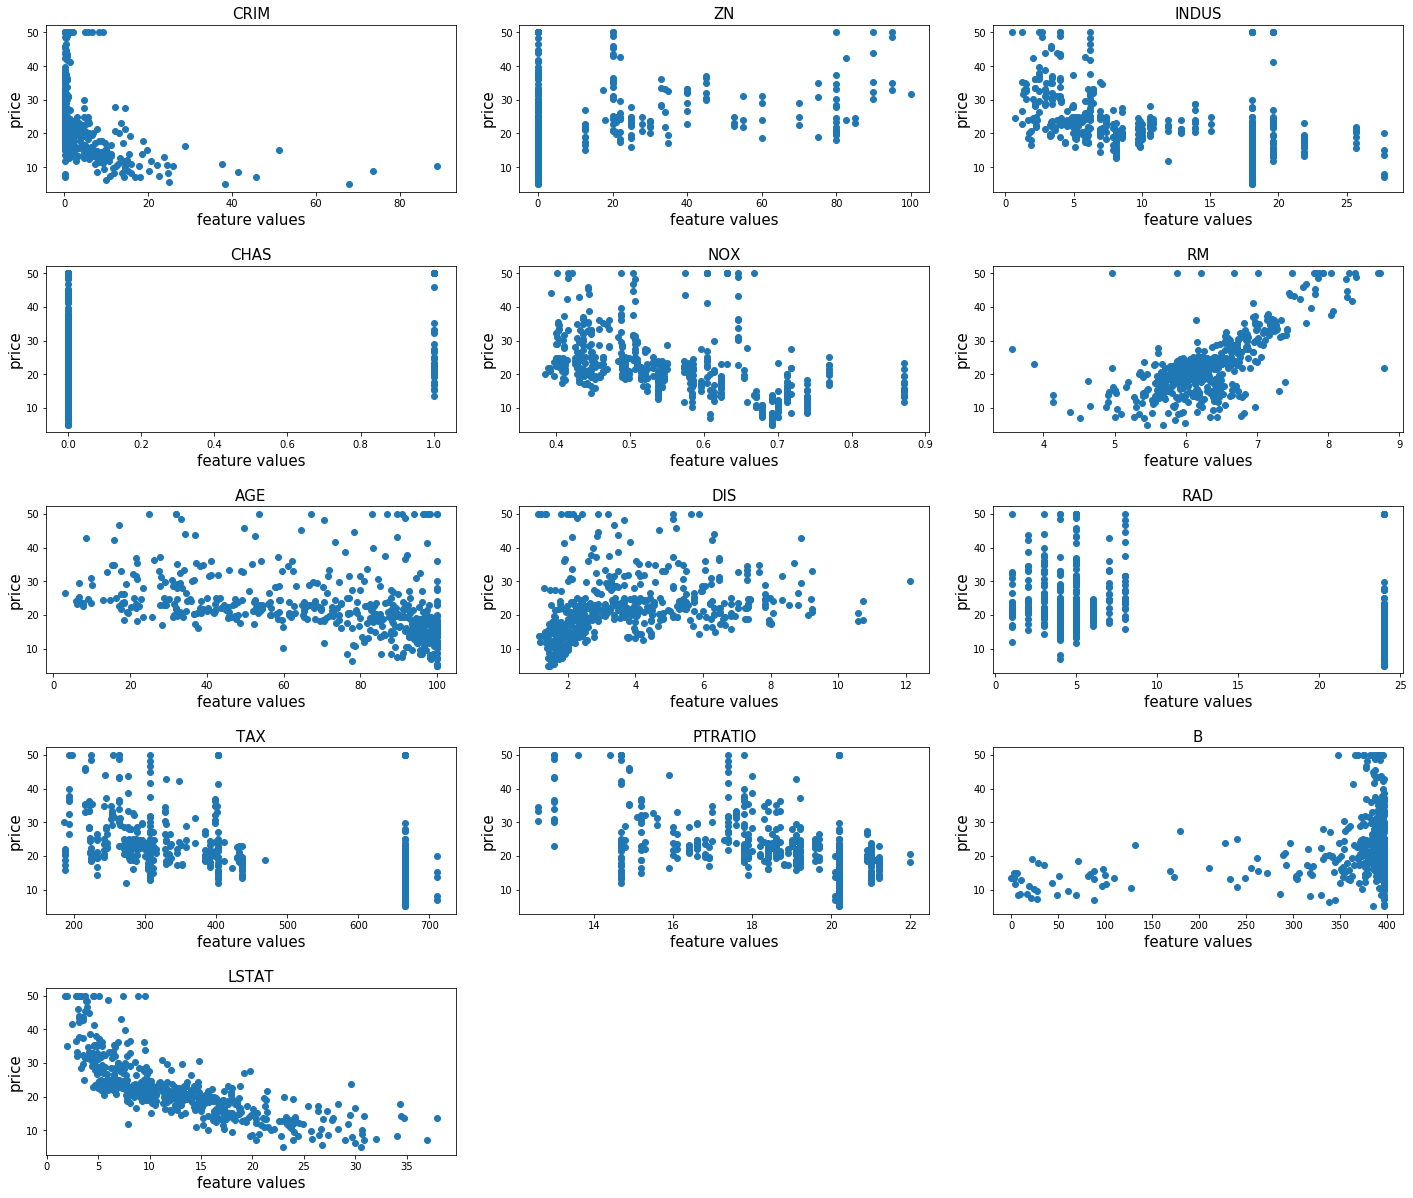

In [41]:
fig = plt.figure(figsize=(20,17))
# plt.subplots_adjust(wspace=0.5, hspace=0.5)
for feature_name,feature_num in zip(columns, range(X.shape[1])):
    plt.subplot(5,3, feature_num+1)
    plt.title(feature_name, fontsize=15)
    plt.xlabel('feature values', fontsize=15)
    plt.ylabel('price', fontsize=15)
    plt.scatter(X[:,feature_num], y)
fig.tight_layout(pad=2.0)
plt.show()

Более продвинутая визуализация - корреляционная матрица:

In [47]:
# !pip install seaborn

In [48]:
import seaborn as sns

In [52]:
dataframe = pd.DataFrame(data=np.hstack((X, y)), columns=columns)

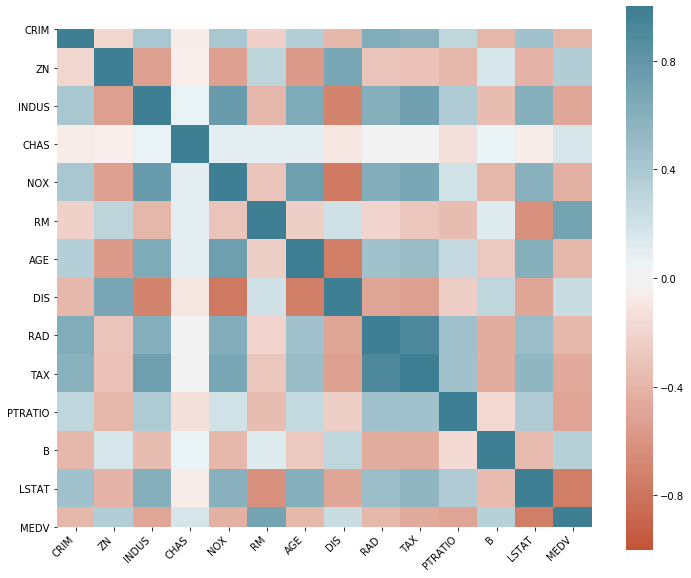

In [59]:
corr = dataframe.corr()

plt.figure(figsize=(12, 10))

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Какая из переменных -- целевая (target)? С какими признаками она корреляирует?

### Преобработка данных (Data preprocessing)

Под предобработкой понимается:
1. Заполнение пропущенных значений ([SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html))
2. Кодирование категориальных признаков ([LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html), [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html))
3. Фильтрация выбросов ([IsolationForest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html))
4. Масштабирование признаков ([StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html))

### Разбиение выборки на Train и Test

In [13]:
from sklearn import model_selection 

X_train, X_test, y_train, y_test = #

### Обучение моделей и вывод метрик

In [14]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import ElasticNet

from sklearn.svm import SVR

from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn import metrics

In [15]:
# models initialization
linreg = LinearRegression()
ridge = Ridge()
lasso = Lasso()
elastic_net = ElasticNet()

svr = SVR()

ada = AdaBoostRegressor()
rf = RandomForestRegressor()
bagging = BaggingRegressor()
grad = GradientBoostingRegressor()

regressors = [linreg, ridge, lasso, elastic_net, svr, ada, rf, bagging, grad]
regressor_names = [
    "Linear Regression", "Ridge", "Lasso", "Elastic Net", 
    "SVR",
    "Bagging", "Random Forest",  
    "AdaBoost", "Gradient Boost"
]

# model selection
for regressor,regressor_name in zip(regressors, regressor_names):
    # training
    #
    # inference / prediction
    predicted_values = #
    # metrics
    print("-----------------------------------\n")
    print(f"For Regressor : {regressor_name}")
    print(f"Mean Absolute Error : {metrics.mean_absolute_error(list(y_test), predicted_values)}")
    print(f"Median Absolute Error : {metrics.median_absolute_error(list(y_test), predicted_values)}")
    print(f"Mean Squared Error : {metrics.mean_squared_error(list(y_test), predicted_values)}")
    print(f"R2 Score : {metrics.r2_score(list(y_test), predicted_values)}")
    print("---------------------------------\n")

-----------------------------------

For Regressor : Linear Regression
Mean Absolute Error : 3.581420617182116
Median Absolute Error : 2.6799330395617442
Mean Squared Error : 25.43569775647693
R2 Score : 0.7162005038757351
---------------------------------

-----------------------------------

For Regressor : Ridge
Mean Absolute Error : 3.614099924161065
Median Absolute Error : 2.481696542080302
Mean Squared Error : 25.818526869736093
R2 Score : 0.7119290775329297
---------------------------------

-----------------------------------

For Regressor : Lasso
Mean Absolute Error : 3.9413207230190705
Median Absolute Error : 2.904157405901886
Mean Squared Error : 31.698006496806208
R2 Score : 0.6463286221567649
---------------------------------

-----------------------------------

For Regressor : Elastic Net
Mean Absolute Error : 3.8980325205878135
Median Absolute Error : 2.8612353030389466
Mean Squared Error : 30.988015565289427
R2 Score : 0.6542503654698986
------------------------------

/Users/izakharkin/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/izakharkin/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/izakharkin/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/izakharkin/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The d

### Подбор гиперпараметров

Возьмем Gradient Boosting и попробуем подобрать гиперпараметры получше:

In [16]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 10]
}

In [19]:
for num_estimators in param_grid['n_estimators']:
    for max_depth in param_grid['max_depth']:
        grad = #
        # training
        #
        # inference / prediction
        #
        # metrics
        print("-----------------------------------\n")
        print(f"For params : num_estimators={num_estimators} max_depth={max_depth}")
        print(f"Mean Absolute Error : {metrics.mean_absolute_error(list(y_test), predicted_values)}")
        print(f"Median Absolute Error : {metrics.median_absolute_error(list(y_test), predicted_values)}")
        print(f"Mean Squared Error : {metrics.mean_squared_error(list(y_test), predicted_values)}")
        print(f"R2 Score : {metrics.r2_score(list(y_test), predicted_values)}")
        print("---------------------------------\n")

/Users/izakharkin/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/izakharkin/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/izakharkin/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-----------------------------------

For params : num_estimators=100 max_depth=3
Mean Absolute Error : 2.1539504319324654
Median Absolute Error : 1.6858332238332014
Mean Squared Error : 10.773399641246963
R2 Score : 0.8797954976897511
---------------------------------

-----------------------------------

For params : num_estimators=100 max_depth=5
Mean Absolute Error : 2.1536736379033443
Median Absolute Error : 1.533048869145416
Mean Squared Error : 10.046561362354318
R2 Score : 0.8879052157438208
---------------------------------

-----------------------------------

For params : num_estimators=100 max_depth=10
Mean Absolute Error : 2.484125936139505
Median Absolute Error : 1.804302362346614
Mean Squared Error : 12.894140734315684
R2 Score : 0.8561332707131127
---------------------------------

-----------------------------------

For params : num_estimators=200 max_depth=3
Mean Absolute Error : 2.170478470999935
Median Absolute Error : 1.6188470830249386
Mean Squared Error : 10.8339

/Users/izakharkin/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/izakharkin/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/izakharkin/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-----------------------------------

For params : num_estimators=200 max_depth=10
Mean Absolute Error : 2.506423388893238
Median Absolute Error : 1.7906797898013416
Mean Squared Error : 12.986242504606517
R2 Score : 0.8551056426821878
---------------------------------

-----------------------------------

For params : num_estimators=300 max_depth=3
Mean Absolute Error : 2.1186946868122427
Median Absolute Error : 1.5268936230068348
Mean Squared Error : 10.744801267482742
R2 Score : 0.8801145848302716
---------------------------------



/Users/izakharkin/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/izakharkin/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-----------------------------------

For params : num_estimators=300 max_depth=5
Mean Absolute Error : 2.154804240118832
Median Absolute Error : 1.4625016728113724
Mean Squared Error : 9.970640805726509
R2 Score : 0.8887523014390012
---------------------------------

-----------------------------------

For params : num_estimators=300 max_depth=10


/Users/izakharkin/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error : 2.499557801390253
Median Absolute Error : 1.849004693885556
Mean Squared Error : 13.208994550741552
R2 Score : 0.8526202806111719
---------------------------------



Какое сочетание получилось наилучшим? Как вы думаете, почему?

### Теперь вам по силам настоящее соревнование!

Поучаствуйте в [реальном соревновании по House Pricing на Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview), чтобы отточить навыки и продолжить постигать машинное обучение.

## Полезные ссылки

Deep Learning School при ФПМИ МФТИ:
* [Официальный сайт](https://www.dlschool.org/) | [Github](https://github.com/DLSchool/deep_learning_2018-19) | [YouTube](https://www.youtube.com/channel/UCFTNoZYjkg-3LZTHrHfV1nQ/) | [VK](https://vk.com/dlschool_mipt) | [Telegram]()

Курсы:
* [Специализация Яндекса по Анализу данных и Машинному обучению](https://ru.coursera.org/specializations/machine-learning-data-analysis)
* [Открытый курс по машинному обучению от OpenDataScience](https://habr.com/ru/company/ods/blog/322626/)
* [deeplearning.ai](https://www.coursera.org/specializations/deep-learning) по Deep Learning (нейронные сети)
* [Stanford cs231n](http://cs231n.stanford.edu/) по Computer Vision
* [Stanford cs224n](http://web.stanford.edu/class/cs224n/) по Natural Language Processing

Демо:
* [Сайт-сборник интерактивных демо по машинному обучению](http://arogozhnikov.github.io/2016/04/28/demonstrations-for-ml-courses.html)